In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import numpy as np

In [2]:
# load json data
with open(r'C:\Users\RidhoBeteer\elclasico.json', encoding="utf8") as f:
    d = json.load(f)

In [3]:
# extract data from dict (credit to: https://github.com/karlosos/)
def extract_data_from_dict(data):
    match_id = data['matchId']
    event_types = data['matchCentreEventTypeJson']
    formation_mappings = data['formationIdNameMappings']
    events_dict = data['matchCentreData']['events']
    teams_dict = {
        data['matchCentreData']['home']['teamId']:data['matchCentreData']['home']['name'],
        data['matchCentreData']['away']['teamId']:data['matchCentreData']['away']['name']
    }
    players_dict = data['matchCentreData']['playerIdNameDictionary']
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df['teamId'] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df['teamId'] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df], ignore_index=True)

    return match_id, event_types, formation_mappings, events_dict, teams_dict, players_df

In [4]:
def get_match_events_list(events):
    event_list = []
    for event in events:
        event_list.append(event['type']['displayName'])

    return event_list

In [5]:
def get_events_df(events):
    df_events = pd.DataFrame(events)
    df_events['event_type'] = df_events.apply(lambda row: row['type']['displayName'], axis=1)
    df_events['outcome_type'] = df_events.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    
    return df_events

In [6]:
match_id, event_types, formation_mappings, events_dict, teams_dict, players_df = extract_data_from_dict(d)

In [38]:
df_events = get_events_df(events_dict)
df_events = df_events.dropna(subset=["playerId"], ignore_index=True)
df_events['player_name'] = df_events['playerId'].map(players_df.set_index('playerId')['name'])
# df_events['matchday'] = 11
# df_events['competition'] = 'LaLiga'
df_events['opposing_team'] = df_events.apply(lambda row: 'Real Madrid' if row['teamId'] == 65 else 'Barcelona', axis=1)
df_events['isHome'] = df_events.apply(lambda row: True if row['teamId'] == 52 else False, axis=1)
df_events

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
0,2.739510e+09,3,0,0.0,52,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Kylian Mbappé,Barcelona,True
1,2.739510e+09,4,0,3.0,52,28.0,52.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Antonio Rüdiger,Barcelona,True
2,2.739510e+09,3,0,8.0,65,23.0,75.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Successful,Alejandro Balde,Real Madrid,False
3,2.739510e+09,5,0,8.0,52,77.0,24.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Unsuccessful,Lucas Vázquez,Barcelona,True
4,2.739510e+09,4,0,9.0,65,20.8,76.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2.739585e+09,819,91,42.0,65,63.9,16.7,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Jules Koundé,Real Madrid,False
1349,2.739585e+09,820,91,50.0,65,94.2,15.6,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 50, 'displayName': 'Dispossessed'}",...,NaN,NaN,NaN,NaN,NaN,Dispossessed,Successful,Lamine Yamal,Real Madrid,False
1350,2.739585e+09,692,91,50.0,52,5.8,84.4,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 7, 'displayName': 'Tackle'}",...,NaN,NaN,NaN,NaN,NaN,Tackle,Successful,Fran García,Barcelona,True
1351,2.739585e+09,693,91,52.0,52,7.1,96.2,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 49, 'displayName': 'BallRecovery'}",...,NaN,NaN,NaN,NaN,NaN,BallRecovery,Successful,Jude Bellingham,Barcelona,True


In [8]:
event_types = {v: k for k, v in event_types.items()}
df_events['satisfiedEventsTypes'] = df_events['satisfiedEventsTypes'].apply(lambda x: [event_types[i] for i in x])

In [9]:
df_events.shape

(1353, 31)

In [10]:
df_events.event_type.unique()

array(['Pass', 'Aerial', 'BallRecovery', 'BlockedPass', 'BallTouch',
       'KeeperPickup', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'Foul', 'CornerAwarded', 'Clearance', 'Dispossessed', 'Tackle',
       'Punch', 'Interception', 'TakeOn', 'SavedShot', 'Save',
       'MissedShots', 'Challenge', 'KeeperSweeper', 'Smother', 'Card',
       'SubstitutionOff', 'SubstitutionOn', 'Goal', 'ShotOnPost'],
      dtype=object)

In [11]:
def filter_dataframe(df, c, v):
    df_filter = df.loc[df[c] == v]
    return df_filter

In [12]:
df_recovery = filter_dataframe(df_events, 'event_type', 'BallRecovery')
df_recovery = filter_dataframe(df_recovery, 'teamId', 65)
df_recovery = df_recovery.sort_values(by=['player_name'])
recovery_players = df_recovery['player_name'].unique()
colors = ['#eedd66', '#acd7c8', '#6b7b7b', '#6a8472', '#ff9ede', '#2a7e19', '#fbedb8', '#fed0fc', '#b4e0e7', '#eaecd3', '#aa9fb2']

In [13]:
# assign color to each unique player
colors_dict = {}
for key in recovery_players:
    for value in colors:
        colors_dict[key] = value
        colors.remove(value)
        break

colors_dict

{'Alejandro Balde': '#eedd66',
 'Dani Olmo': '#acd7c8',
 'Fermín López': '#6b7b7b',
 'Iñaki Peña': '#6a8472',
 'Iñigo Martínez': '#ff9ede',
 'Jules Koundé': '#2a7e19',
 'Lamine Yamal': '#fbedb8',
 'Marc Casadó': '#fed0fc',
 'Pau Cubarsí': '#b4e0e7',
 'Pedri': '#eaecd3',
 'Raphinha': '#aa9fb2'}

In [14]:
df_recovery['color'] = df_recovery['player_name'].apply(lambda x: colors_dict.get(x))

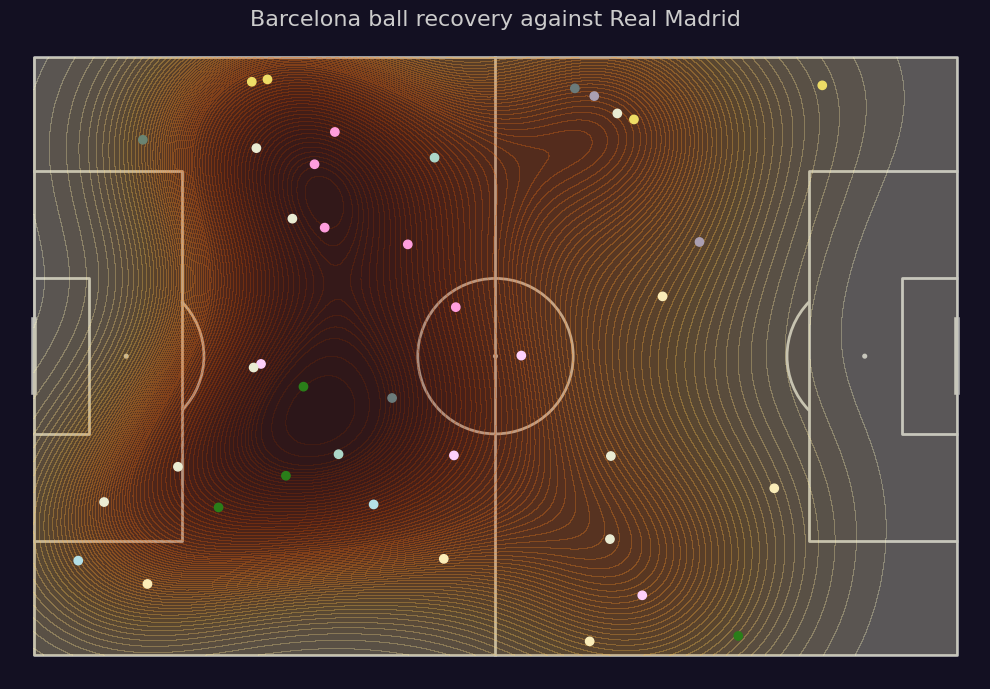

In [15]:
pitch = Pitch(pitch_type='wyscout', pitch_color='#131022')
fig, ax = pitch.draw(figsize=(11, 7), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#131022')

pitch.kdeplot(df_recovery.x, df_recovery.y, ax=ax,
              fill=True, levels=75, thresh=0,
              cut=4, alpha=0.3, cmap='YlOrBr')
pitch.scatter(df_recovery.x, df_recovery.y, c=df_recovery.color, ax=ax)
ax_title = ax.set_title(f'Barcelona ball recovery against Real Madrid', fontsize=16, color='#ccc')
plt.gca().invert_yaxis()

In [39]:
goals_idx = df_events.index[df_events.event_type == 'Goal']
goals_idx

Index([840, 861, 1176, 1262], dtype='int64')

In [82]:
gca_idx = []
for idx, val in enumerate(goals_idx):
    gca_idx.append(val-2)
    gca_idx.append(val-1)

df_events.iloc[gca_idx]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
838,2.739562e+09,530,53,5.0,65,49.4,77.2,56,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Iñigo Martínez,Real Madrid,False
839,2.739562e+09,531,53,10.0,65,52.7,56.6,56,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Marc Casadó,Real Madrid,False
859,2.739564e+09,548,55,29.0,65,48.1,53.9,58,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Frenkie de Jong,Real Madrid,False
860,2.739564e+09,549,55,33.0,65,88.1,92.7,58,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
1174,2.739577e+09,590,76,46.0,52,48.4,25.1,79,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Antonio Rüdiger,Barcelona,True
1175,2.739577e+09,737,76,48.0,65,73.0,48.2,79,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Raphinha,Real Madrid,False
1260,2.739581e+09,770,83,45.0,65,8.1,56.9,86,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Iñaki Peña,Real Madrid,False
1261,2.739581e+09,771,83,49.0,65,29.7,79.4,86,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Iñigo Martínez,Real Madrid,False


In [87]:
shot_idx = df_events.index[(df_events.isShot == True) & (df_events.teamId == 65)]
sca_idx = []
for idx, val in enumerate(shot_idx):
    sca_idx.append(val-2)
    sca_idx.append(val-1)


In [108]:
sca = df_events.iloc[sca_idx]
barca_fw = ['Lamine Yamal', 'Raphinha', 'Robert Lewandowski']
fw_sca = sca.loc[(sca.player_name.isin(barca_fw)) & (sca.event_type != 'Interception') & (sca.teamId == 65)]
fw_recov = df_recovery.loc[df_recovery.player_name.isin(barca_fw)]
fw_shot = df_events.loc[(df_events.isShot == True) & (df_events.teamId == 65) & df_events.player_name.isin(barca_fw)]